# MLP Project

## Data Loading

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#load data
train_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [3]:
#Basic Information Display
print("Train Data Info:")
print(train_data.info())
print("\n\n Test Data Info:")
print(test_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm    

In [4]:
#Display the first few rows
print("\n Training Data:")
train_data.head()


 Training Data:


,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


## Exploratory Data Analysis
* Data Visualization
* Statistical Analysis

In [5]:
#Checking for missing values
missing_values = train_data.isnull().sum()
print(f"Missing values: \n{missing_values[missing_values>0]}")

Missing values: 
RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBatteryNu

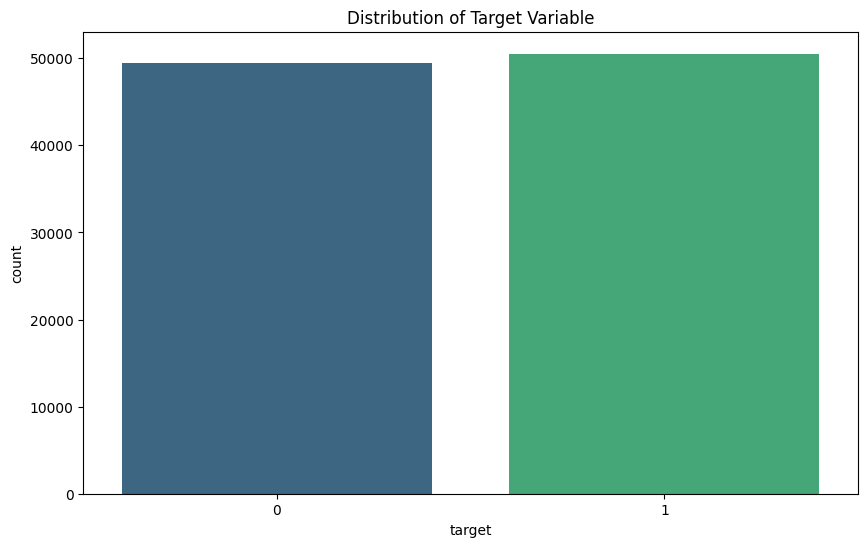

In [6]:
#Target variable distribution
plt.figure(figsize=(10,6))
sns.countplot(x="target", data = train_data, palette = "viridis")
plt.title("Distribution of Target Variable")
plt.show()

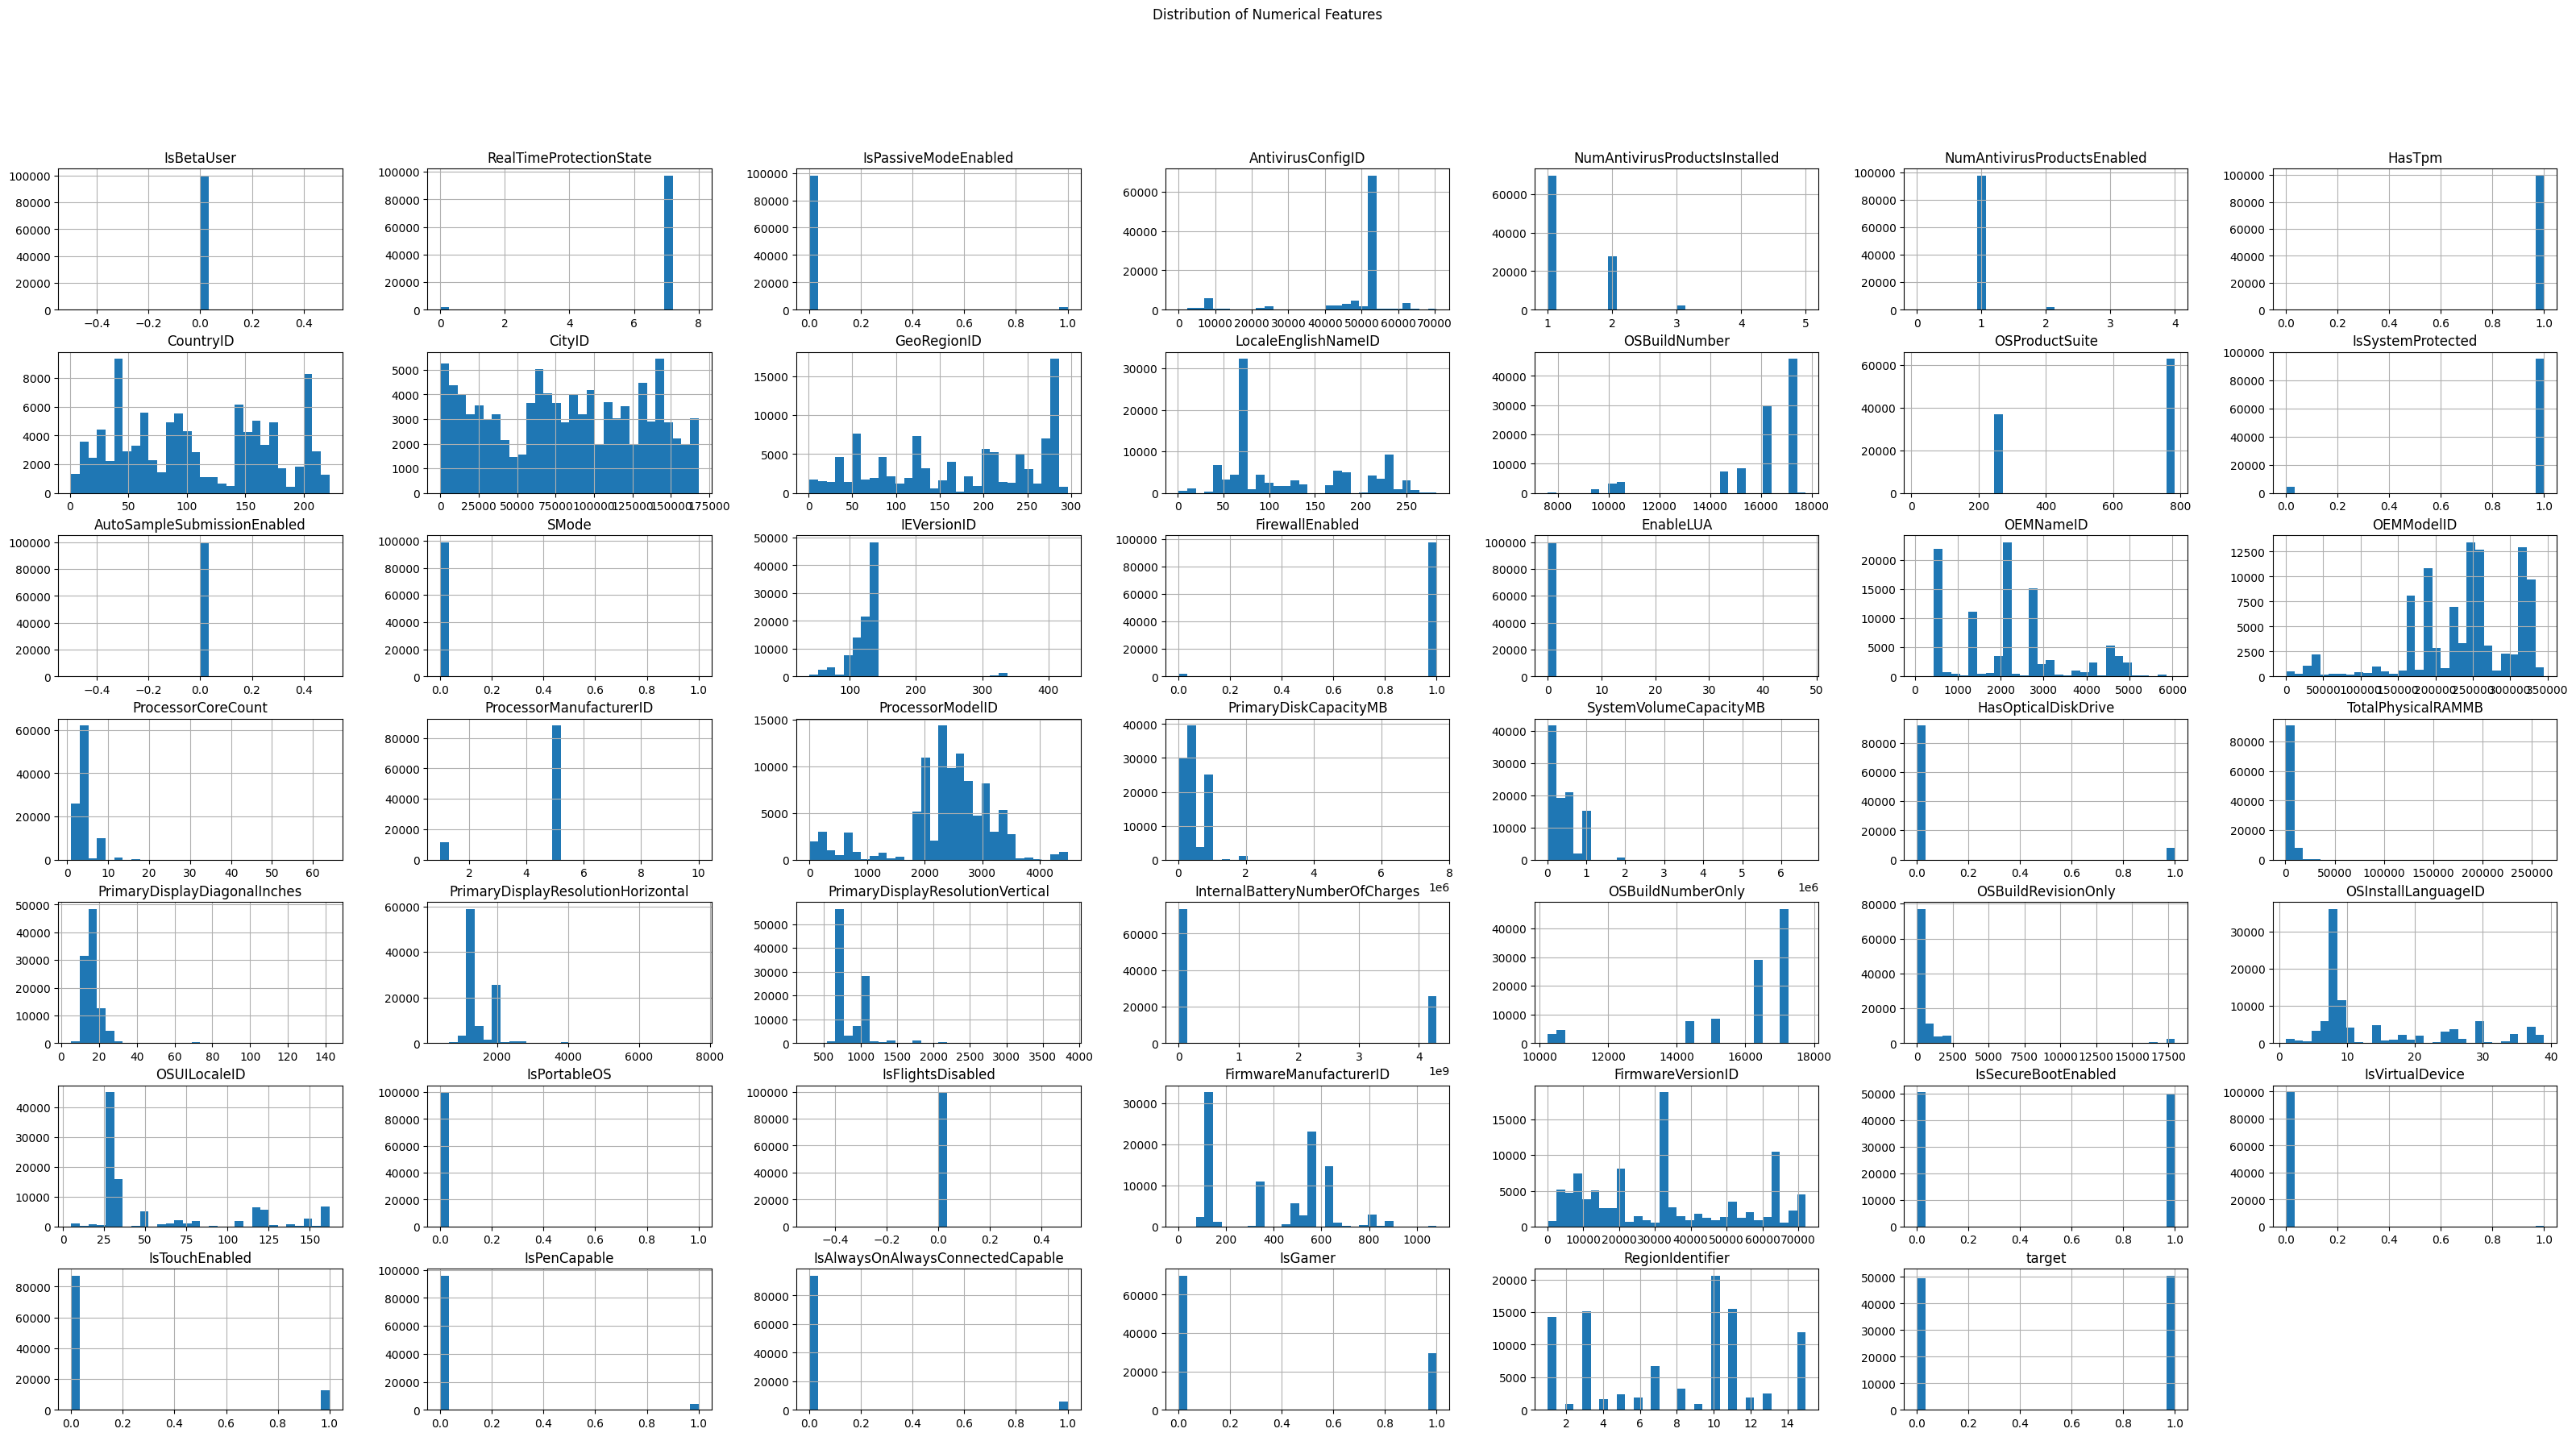

In [7]:
#Feature distributions (Histogram)
num_features = train_data.select_dtypes(include = [np.number]).columns.tolist()
train_data[num_features].hist(figsize=(40,20), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

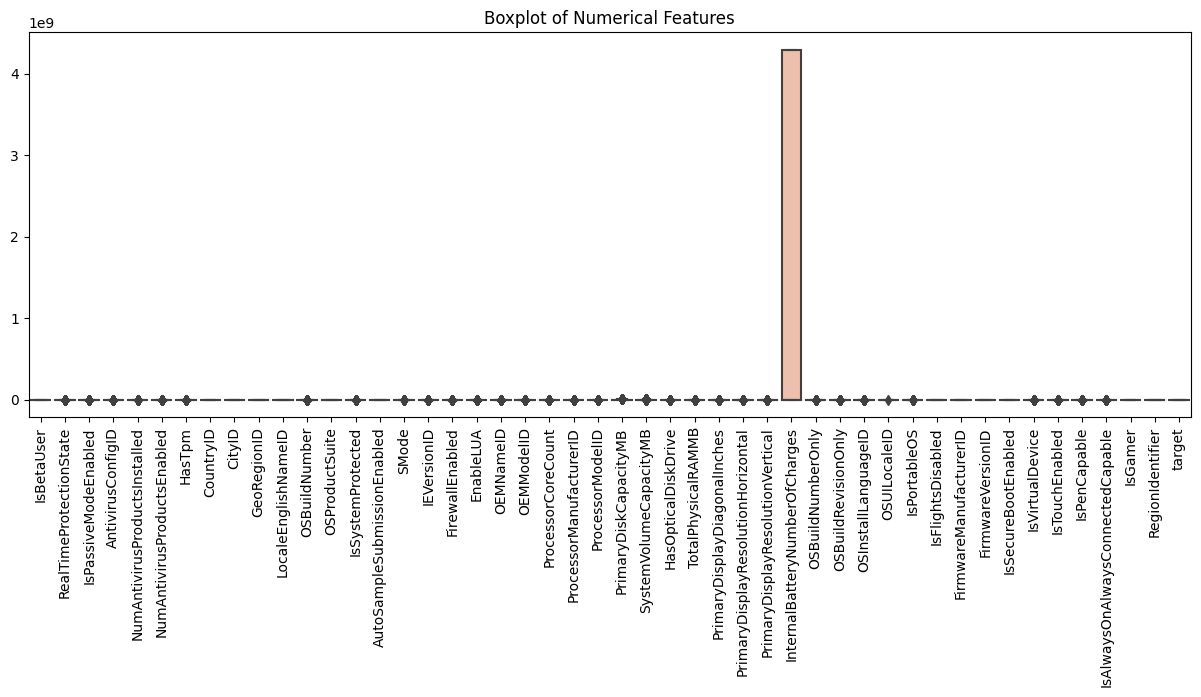

In [8]:
#Boxplots for numerical features 
plt.figure(figsize=(15,5))
sns.boxplot(data = train_data[num_features], palette = "coolwarm")
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

There are 31 float, 17 integer, and 28 object columns. There are missing values in columns like RealTimeProtectionState, IsPassiveModeEnabled, CityID, IsGamer, etc. We have handled these values by removing the rows with NaN values present using the dropna() function. 

There are columns like ProductName, OSVersion, Processor, OSArchitecture, OSEdition, etc. that are categorical and will require encoding for machine learning models. 

The target column represents whether malware was detected ( 0: No, 1: Yes). This is the variable we aim to predict using machine learning models. 

Target Value Distribution:
* Class 1: 50,525 samples
* Class 0: 49,475 samples


## Training Test Split & Model Cleaning

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import lightgbm as lgb
import xgboost as xgb

In [10]:
train_data.drop_duplicates(inplace=True)

In [11]:
train_data = train_data.drop(train_data.index[-1])

In [12]:
# Split features and target variables
X = train_data.drop(columns=["target"])
y = train_data["target"]

In [13]:
#Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [14]:
#Encoding categorical features
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    # Fit on the combined unique values from both train, validation and test data
    all_data = pd.concat([X_train[col].astype(str), X_val[col].astype(str), test_data[col].astype(str)])
    le.fit(all_data.unique())
    X_train[col] = le.transform(X_train[col].astype(str))
    X_val[col] = le.transform(X_val[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str)) # Apply transform to test_data

In [15]:
imputer = SimpleImputer(strategy = "median") #Using median for numerical columns
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns = X.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns = X.columns)
test_data = pd.DataFrame(imputer.transform(test_data), columns = X.columns)

In [16]:
#Feature scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns = X.columns)
test_data = pd.DataFrame(scaler.transform(test_data), columns = X.columns)

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


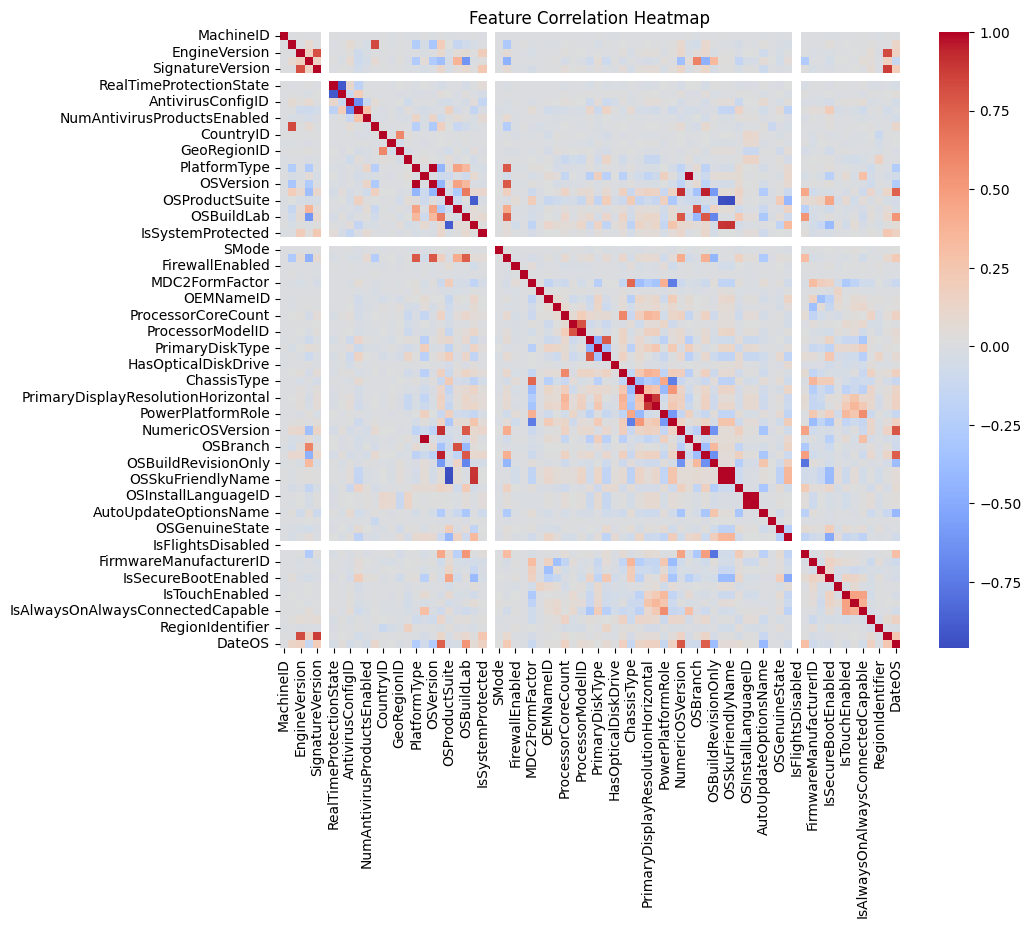

In [17]:
# Compute correlation matrix
corr_matrix = X_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


## Basic Model

In [18]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier().fit(X_train,y_train)
y_pred = model.predict(X_val)

In [19]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5052837181349227


## Model Building 1

* Linear Models
* Stochastic Gradient Descent

Tuning the hypermaters of the models

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

### Logistic Regression

In [21]:
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

In [22]:
log_acc = accuracy_score(y_val, y_pred_log)
print(f"Accuracy for Logistic Regression: {log_acc}")

Accuracy for Logistic Regression: 0.5928782491110332


In [23]:
log_auc = roc_auc_score(y_val, y_pred_log)
print(f"ROC-AUC for Logistic Regression: {log_auc}")

ROC-AUC for Logistic Regression: 0.592024532982634


### Stochastic Gradient Descent - SGDClassifier

In [24]:
sgd = SGDClassifier(loss = "log_loss", penalty = "l2", max_iter = 1000, random_state = 42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_val)

In [25]:
sgd_acc = accuracy_score(y_val, y_pred_sgd)
print(f"Accuracy for SGD Classifier: {sgd_acc}")

Accuracy for SGD Classifier: 0.5816597385686383


In [26]:
sgd_auc = roc_auc_score(y_val, y_pred_sgd)
print(f"ROC-AUC for SGD Classifier: {sgd_auc}")

ROC-AUC for SGD Classifier: 0.5808015936962411


### Hyperparameter Tuning - Logistic Regression

In [27]:
from scipy.stats import uniform

In [28]:
log_reg_param = {
    "C" : uniform(0.001, 10), #Regularization paramter
    "solver" : ["liblinear", "lbfgs", "newton-cg"]
}

log_reg_tuned = RandomizedSearchCV(LogisticRegression(max_iter = 1000, 
                                                      random_state = 42),
                                   param_distributions = log_reg_param,
                                   n_iter = 10,
                                   cv = 3, 
                                   scoring = "roc_auc", 
                                   random_state = 42, 
                                   n_jobs = -1)

log_reg_tuned.fit(X_train, y_train)

print(f"Best Parameters: {log_reg_tuned.best_params_}")
print(f"Best Score: {log_reg_tuned.best_score_}")

Best Parameters: {'C': 4.593488919658672, 'solver': 'liblinear'}
Best Score: 0.6324560867494627


In [29]:
y_pred_tuned = log_reg_tuned.best_estimator_.predict(X_val)

log_tuned_acc = accuracy_score(y_val, y_pred_tuned)
print(f"Logistic Regression Hyperparameter Tuned: {log_tuned_acc:.4f}")

Logistic Regression Hyperparameter Tuned: 0.5928


### Hyperparameter Tuning - SGDClassifier

In [30]:
sgd_params = {
    'alpha' : uniform(0.0001, 0.1), #Learning rate parameter
    "penalty" : ["l2", "l1", "elasticnet"],
    "max_iter" : [500, 1000, 2000],
    "tol" : [1e-3, 1e-4, 1e-5]
}

In [31]:
sgd_tuned = RandomizedSearchCV(SGDClassifier(loss = "log_loss", 
                                             random_state = 42),
                               param_distributions = sgd_params, 
                               n_iter = 10, 
                               cv = 3,
                               scoring = "roc_auc",
                               random_state = 42, 
                               n_jobs = -1)

sgd_tuned.fit(X_train, y_train)

print(f"Best Parameters: {sgd_tuned.best_params_}")
print(f"Best Score: {sgd_tuned.best_score_}")

Best Parameters: {'alpha': 0.018282496720710063, 'max_iter': 500, 'penalty': 'l2', 'tol': 0.0001}
Best Score: 0.6315746496468883


In [32]:
#Final Model Evaluations

y_pred_log_tuned = log_reg_tuned.best_estimator_.predict(X_val)
y_pred_sgd_tuned = sgd_tuned.best_estimator_.predict(X_val)

log_acc_tuned = accuracy_score(y_val, y_pred_log_tuned)
sgd_acc_tuned = accuracy_score(y_val, y_pred_sgd_tuned)

print(f"Accuracy for Logistic Regression (Tuned): {log_acc_tuned}")
print(f"Accuracy for SGD Classifier (Tuned): {sgd_acc_tuned}")

Accuracy for Logistic Regression (Tuned): 0.5927780838383333
Accuracy for SGD Classifier (Tuned): 0.591175439475134


## Dimensionality Reduction - PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
# Apply PCA (keeping 95% variance)
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
test_pca = pca.transform(test_data)

In [35]:
print(f"Original features: {X_train.shape[1]}, Reduced features: {X_train_pca.shape[1]}")

Original features: 75, Reduced features: 46


## Training New Models

* Naive Bayes
* K-Nearest Neighbors (KNN)
* Support Vector Machines (SVM)

In [36]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)
y_pred_nb = nb_model.predict(X_val_pca)

print(f"Naïve Bayes Accuracy: {accuracy_score(y_val, y_pred_nb):.4f}")

Naïve Bayes Accuracy: 0.5511


In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_val_pca)

print(f"KNN Accuracy: {accuracy_score(y_val, y_pred_knn):.4f}")

KNN Accuracy: 0.5591


## Ensemble Learning

In [38]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Bagging - Random Forest Classifier

In [39]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

rf_acc = accuracy_score(y_val, y_pred_rf)
print(f"Accuracy for Random Forest: {rf_acc}")

Accuracy for Random Forest: 0.6110081634697251


### Boosting - XGBoost

In [40]:
xgb_model = xgb.XGBClassifier(n_estimators = 100,
                              learning_rate = 0.1, random_state = 42, 
                              use_label_encoder = False, eval_metric = "logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

xgb_acc = accuracy_score(y_val, y_pred_xgb)
print(f"Accuracy for XGBoost: {xgb_acc}")

Accuracy for XGBoost: 0.6195222116492212


In [41]:
# Use the best parameters from log_reg_tuned to predict on the test_data
y_test_xgb = xgb_model.predict(test_data)

# Create a submission DataFrame
submission_xgb = pd.DataFrame({"id": range(0, test_data.shape[0]),
                                 "target": y_test_xgb})

# Save the submission to a CSV file
submission_xgb.to_csv("submission.csv", index=False)

### Boosting - LightGBM

In [42]:
lgb_model = lgb.LGBMClassifier(n_estimators = 100,
                               learning_rate = 0.1,
                               random_state = 42)

lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_val)

lgb_acc = accuracy_score(y_val, y_pred_lgb)
print(f"Accuracy for LightGBM: {lgb_acc}")

[LightGBM] [Info] Number of positive: 40354, number of negative: 39513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4932
[LightGBM] [Info] Number of data points in the train set: 79867, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505265 -> initscore=0.021061
[LightGBM] [Info] Start training from score 0.021061
Accuracy for LightGBM: 0.6173686582861722


### Stacking Ensemble

In [43]:
estimators = [
    ("rf", RandomForestClassifier(n_estimators = 100, random_state = 42)),
    ("xgb", xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42, 
                              use_label_encoder = False, eval_metric = "logloss")),
    ("lgb", lgb.LGBMClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42) )    
]

In [44]:
stacking_model = StackingClassifier(estimators = estimators, final_estimator = RandomForestClassifier(n_estimators = 100, random_state = 42))

stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_val)

stack_acc = accuracy_score(y_val, y_pred_stack)
print(f"Stacking Model Accuracy: {stack_acc:.4f}")

[LightGBM] [Info] Number of positive: 40354, number of negative: 39513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4932
[LightGBM] [Info] Number of data points in the train set: 79867, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505265 -> initscore=0.021061
[LightGBM] [Info] Start training from score 0.021061
[LightGBM] [Info] Number of positive: 32283, number of negative: 31610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4848
[LightGBM] [Info] Number of data points in the train set: 63893, number of used features: 71
[LightGBM] [Info] [b

### Multi Level Perceptron

In [45]:
mlp = MLPClassifier(hidden_layer_sizes = (128, 64, 32),
                   activation = "relu",
                   solver="adam",
                    alpha = 0.001,
                   max_iter = 300, 
                   random_state = 42,
                   early_stopping = True #Stop if not improvement
                   )
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_val)

mlp_acc = accuracy_score(y_val, y_pred_mlp)
print(f"MLP Classifier Accuracy: {mlp_acc:.4f}")

MLP Classifier Accuracy: 0.6050


## Comparison of Best Models 

Based on the accuracy results, the top performing models are:


Model | Accuracy
--- | ---
XGBoost (Boosting) | 0.6192
LightGBM (Boosting) | 0.6174
Random Forest (Bagging) | 0.6097
Logistic Regression | 0.5928
Logistic Regression (post Hyperparameter Tuning) | 0.5924
SGD Classifier (post Hyperparameter Tuning) | 0.5913

Why is the XGBoost Model best performing - 

* Uses gradient boosting, which is effective for structured data
* Handles missing values well and learns better feature interactions
* Optimized tree-based learning, making it powerful for classification

Why is LightGBM second best performing - 

* Works well with large datasets
* Faster than XGBoost while achieving similar accuracy
* Uses histogram-based learning, making it memory efficient

Why is Random Forest perfoming good - 

* Uses bagging (ensemble of decision trees), reducing overfitting
* Works well even with default parameters
* Less sensitive to outliers compared to boosting methods